In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
import random

random.seed(10)


def get_windows(job,n_neighbors):
    '''
    For each region and each individual cell in dataset, return the indices of the nearest neighbors.
    
    'job:  meta data containing the start time,index of region, region name, indices of region in original dataframe
    n_neighbors:  the number of neighbors to find for each cell
    '''
    start_time,idx,tissue_name,indices = job
    job_start = time.time()
    
    print ("Starting:", str(idx+1)+'/'+str(len(exps)),': ' + exps[idx])

    tissue = tissue_group.get_group(tissue_name)
    to_fit = tissue.loc[indices][[X,Y]].values

#     fit = NearestNeighbors(n_neighbors=n_neighbors+1).fit(tissue[[X,Y]].values)
    fit = NearestNeighbors(n_neighbors=n_neighbors).fit(tissue[[X,Y]].values)
    m = fit.kneighbors(to_fit)
#     m = m[0][:,1:], m[1][:,1:]
    m = m[0], m[1]

    #sort_neighbors
    args = m[0].argsort(axis = 1)
    add = np.arange(m[1].shape[0])*m[1].shape[1]
    sorted_indices = m[1].flatten()[args+add[:,None]]

    neighbors = tissue.index.values[sorted_indices]
   
    end_time = time.time()
   
    print ("Finishing:", str(idx+1)+"/"+str(len(exps)),": "+ exps[idx],end_time-job_start,end_time-start_time)
    return neighbors.astype(np.int32)

In [2]:
ks = [5,10,20] # k=5 means it collects 5 nearest neighbors for each center cell
path_to_data = 'csv.csv' #CA the name does not matter here other than .csv extention, we will read and combine data in the cell below
X = 'X:X'
Y = 'Y:Y'
reg = 'File Name'
file_type = 'csv'

cluster_col = 'ClusterName'
keep_cols = [X,Y,reg,cluster_col]
save_path = ''

In [3]:
#read in data and do some quick data rearrangement
n_neighbors = max(ks)
assert (file_type=='csv' or file_type =='pickle') #


if file_type == 'pickle':
    cells = pd.read_pickle(path_to_data)
if file_type == 'csv':
    #CA read data to be combined
    cells1 = pd.read_csv('G3-PCa_dfmerged_Nolan-names_0904.csv')
    cells2 = pd.read_csv('G4-PCa_dfmerged_Nolan-names_0904.csv')
    cells3 = pd.read_csv('TAN-PCa_dfmerged_Nolan-names_0904.csv')
    
    #CA combine all data read with the next to line
cells_3groups = [cells1, cells2, cells3]
cells_all = pd.concat(cells_3groups)

cells = pd.concat([cells_all,pd.get_dummies(cells_all[cluster_col])],1)

cells = cells.reset_index() #Uncomment this line if you do any subsetting of dataframe such as removing dirt etc or will throw error at end of next next code block (cell 6)

sum_cols = cells[cluster_col].unique()
values = cells[sum_cols].values
list(cells['patients'].unique())

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/1383547729.py:18: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  cells = pd.concat([cells_all,pd.get_dummies(cells_all[cluster_col])],1)


[12, 11, 10, 13, 9, 7, 8, 6, 5, 4, 3, 2, 1]

In [4]:
(cells[['Region','patients']])
list(cells['Region'].unique())

['17633-6',
 '19142-6',
 '24952-6',
 '33548-6',
 '48411-6',
 '18538-6',
 '38592-6',
 '54774-4',
 '57494-6',
 '57658-6',
 '30411-6',
 '31022-6',
 '31480-6']

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:19: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  cells = pd.concat([cells_all,pd.get_dummies(cells_all[cluster_col])],1)


[11, 10, 13, 9, 7, 8, 6, 5, 4, 3, 2, 1]
Starting: 5/12 : 18538-6
Finishing: 5/12 : 18538-6 0.07766914367675781 0.0782771110534668
Starting: 1/12 : 19142-6
Finishing: 1/12 : 19142-6 0.13037991523742676 0.22047805786132812
Starting: 2/12 : 24952-6
Finishing: 2/12 : 24952-6 0.32656097412109375 0.5498528480529785
Starting: 10/12 : 30411-6
Finishing: 10/12 : 30411-6 0.23737788200378418 0.793910026550293
Starting: 11/12 : 31022-6
Finishing: 11/12 : 31022-6 0.24854660034179688 1.049257755279541
Starting: 12/12 : 31480-6
Finishing: 12/12 : 31480-6 0.24217987060546875 1.2965071201324463
Starting: 3/12 : 33548-6
Finishing: 3/12 : 33548-6 0.49545979499816895 1.797961950302124
Starting: 6/12 : 38592-6
Finishing: 6/12 : 38592-6 0.017304658889770508 1.827549934387207
Starting: 4/12 : 48411-6
Finishing: 4/12 : 48411-6 0.052642107009887695 1.8848850727081299
Starting: 7/12 : 54774-4
Finishing: 7/12 : 54774-4 0.3042459487915039 2.190401077270508
Starting: 8/12 : 57494-6
Finishing: 8/12 : 57494-6 0.1087

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:52: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([cells[keep_cols],window],1)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72

[12, 10, 13, 9, 7, 8, 6, 5, 4, 3, 2, 1]
Starting: 1/12 : 17633-6
Finishing: 1/12 : 17633-6 0.3827838897705078 0.3834099769592285
Starting: 5/12 : 18538-6
Finishing: 5/12 : 18538-6 0.06588602066040039 0.4680171012878418
Starting: 2/12 : 24952-6
Finishing: 2/12 : 24952-6 0.3364830017089844 0.8096990585327148
Starting: 10/12 : 30411-6
Finishing: 10/12 : 30411-6 0.25316810607910156 1.0697689056396484
Starting: 11/12 : 31022-6
Finishing: 11/12 : 31022-6 0.2546229362487793 1.331921100616455
Starting: 12/12 : 31480-6
Finishing: 12/12 : 31480-6 0.2535898685455322 1.5908989906311035
Starting: 3/12 : 33548-6
Finishing: 3/12 : 33548-6 0.5044388771057129 2.101715087890625
Starting: 6/12 : 38592-6
Finishing: 6/12 : 38592-6 0.017332077026367188 2.1313230991363525
Starting: 4/12 : 48411-6
Finishing: 4/12 : 48411-6 0.05534505844116211 2.1915290355682373
Starting: 7/12 : 54774-4
Finishing: 7/12 : 54774-4 0.3149588108062744 2.507885694503784
Starting: 8/12 : 57494-6
Finishing: 8/12 : 57494-6 0.113265037

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:52: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([cells[keep_cols],window],1)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72

[12, 11, 13, 9, 7, 8, 6, 5, 4, 3, 2, 1]
Starting: 1/12 : 17633-6
Finishing: 1/12 : 17633-6 0.39775609970092773 0.3984091281890869
Starting: 5/12 : 18538-6
Finishing: 5/12 : 18538-6 0.07101178169250488 0.4821927547454834
Starting: 2/12 : 19142-6
Finishing: 2/12 : 19142-6 0.13097906112670898 0.6177263259887695
Starting: 10/12 : 30411-6
Finishing: 10/12 : 30411-6 0.25426387786865234 0.8745830059051514
Starting: 11/12 : 31022-6
Finishing: 11/12 : 31022-6 0.25652194023132324 1.137012004852295
Starting: 12/12 : 31480-6
Finishing: 12/12 : 31480-6 0.25256776809692383 1.39644193649292
Starting: 3/12 : 33548-6
Finishing: 3/12 : 33548-6 0.5031428337097168 1.9066948890686035
Starting: 6/12 : 38592-6
Finishing: 6/12 : 38592-6 0.01888728141784668 1.937952995300293
Starting: 4/12 : 48411-6
Finishing: 4/12 : 48411-6 0.06034207344055176 2.00323486328125
Starting: 7/12 : 54774-4
Finishing: 7/12 : 54774-4 0.30059003829956055 2.3051271438598633
Starting: 8/12 : 57494-6
Finishing: 8/12 : 57494-6 0.10885190

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:52: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([cells[keep_cols],window],1)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72

[12, 11, 10, 9, 7, 8, 6, 5, 4, 3, 2, 1]
Starting: 1/12 : 17633-6
Finishing: 1/12 : 17633-6 0.3887288570404053 0.38949084281921387
Starting: 5/12 : 18538-6
Finishing: 5/12 : 18538-6 0.07224106788635254 0.475344181060791
Starting: 2/12 : 19142-6
Finishing: 2/12 : 19142-6 0.14716482162475586 0.6281158924102783
Starting: 3/12 : 24952-6
Finishing: 3/12 : 24952-6 0.388333797454834 1.0198078155517578
Starting: 10/12 : 30411-6
Finishing: 10/12 : 30411-6 0.26201415061950684 1.2887098789215088
Starting: 11/12 : 31022-6
Finishing: 11/12 : 31022-6 0.28147196769714355 1.5769572257995605
Starting: 12/12 : 31480-6
Finishing: 12/12 : 31480-6 0.283311128616333 1.8659019470214844
Starting: 6/12 : 38592-6
Finishing: 6/12 : 38592-6 0.016801834106445312 1.8888027667999268
Starting: 4/12 : 48411-6
Finishing: 4/12 : 48411-6 0.05493879318237305 1.9466919898986816
Starting: 7/12 : 54774-4
Finishing: 7/12 : 54774-4 0.3363368511199951 2.2838289737701416
Starting: 8/12 : 57494-6
Finishing: 8/12 : 57494-6 0.133504

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:52: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([cells[keep_cols],window],1)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72

[12, 11, 10, 13, 7, 8, 6, 5, 4, 3, 2, 1]
Starting: 1/12 : 17633-6
Finishing: 1/12 : 17633-6 0.36533474922180176 0.36594104766845703
Starting: 5/12 : 18538-6
Finishing: 5/12 : 18538-6 0.06331801414489746 0.44542384147644043
Starting: 2/12 : 19142-6
Finishing: 2/12 : 19142-6 0.13643693923950195 0.5869810581207275
Starting: 3/12 : 24952-6
Finishing: 3/12 : 24952-6 0.32726311683654785 0.9172589778900146
Starting: 10/12 : 30411-6
Finishing: 10/12 : 30411-6 0.2351398468017578 1.1593549251556396
Starting: 11/12 : 31022-6
Finishing: 11/12 : 31022-6 0.2519810199737549 1.4183108806610107
Starting: 12/12 : 31480-6
Finishing: 12/12 : 31480-6 0.24040532112121582 1.6637051105499268
Starting: 4/12 : 33548-6
Finishing: 4/12 : 33548-6 0.49510884284973145 2.1648077964782715
Starting: 6/12 : 38592-6
Finishing: 6/12 : 38592-6 0.018758773803710938 2.195760726928711
Starting: 7/12 : 54774-4
Finishing: 7/12 : 54774-4 0.3079509735107422 2.5089809894561768
Starting: 8/12 : 57494-6
Finishing: 8/12 : 57494-6 0.1

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:52: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([cells[keep_cols],window],1)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72

[12, 11, 10, 13, 9, 8, 6, 5, 4, 3, 2, 1]
Starting: 1/12 : 17633-6
Finishing: 1/12 : 17633-6 0.35399508476257324 0.35460805892944336
Starting: 2/12 : 19142-6
Finishing: 2/12 : 19142-6 0.12918400764465332 0.5006768703460693
Starting: 3/12 : 24952-6
Finishing: 3/12 : 24952-6 0.32781004905700684 0.8343281745910645
Starting: 10/12 : 30411-6
Finishing: 10/12 : 30411-6 0.24071884155273438 1.0818119049072266
Starting: 11/12 : 31022-6
Finishing: 11/12 : 31022-6 0.24104094505310059 1.329563856124878
Starting: 12/12 : 31480-6
Finishing: 12/12 : 31480-6 0.2448568344116211 1.5796458721160889
Starting: 4/12 : 33548-6
Finishing: 4/12 : 33548-6 0.48835301399230957 2.0739457607269287
Starting: 6/12 : 38592-6
Finishing: 6/12 : 38592-6 0.017078161239624023 2.1036019325256348
Starting: 5/12 : 48411-6
Finishing: 5/12 : 48411-6 0.05166006088256836 2.160217046737671
Starting: 7/12 : 54774-4
Finishing: 7/12 : 54774-4 0.29828405380249023 2.4597790241241455
Starting: 8/12 : 57494-6
Finishing: 8/12 : 57494-6 0.1

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:52: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([cells[keep_cols],window],1)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72

[12, 11, 10, 13, 9, 7, 6, 5, 4, 3, 2, 1]
Starting: 1/12 : 17633-6
Finishing: 1/12 : 17633-6 0.35143232345581055 0.3520350456237793
Starting: 6/12 : 18538-6
Finishing: 6/12 : 18538-6 0.06176114082336426 0.4307730197906494
Starting: 2/12 : 19142-6
Finishing: 2/12 : 19142-6 0.1278688907623291 0.5631639957427979
Starting: 3/12 : 24952-6
Finishing: 3/12 : 24952-6 0.3245728015899658 0.890636682510376
Starting: 10/12 : 30411-6
Finishing: 10/12 : 30411-6 0.2326209545135498 1.1300098896026611
Starting: 11/12 : 31022-6
Finishing: 11/12 : 31022-6 0.2387692928314209 1.3756811618804932
Starting: 12/12 : 31480-6
Finishing: 12/12 : 31480-6 0.2391359806060791 1.6199350357055664
Starting: 4/12 : 33548-6
Finishing: 4/12 : 33548-6 0.4865899085998535 2.1124579906463623
Starting: 5/12 : 48411-6
Finishing: 5/12 : 48411-6 0.049633026123046875 2.173832893371582
Starting: 7/12 : 54774-4
Finishing: 7/12 : 54774-4 0.2987830638885498 2.4777469635009766
Starting: 8/12 : 57494-6
Finishing: 8/12 : 57494-6 0.10771799

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:52: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([cells[keep_cols],window],1)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72

[12, 11, 10, 13, 9, 7, 8, 5, 4, 3, 2, 1]
Starting: 1/12 : 17633-6
Finishing: 1/12 : 17633-6 0.37018704414367676 0.37085485458374023
Starting: 6/12 : 18538-6
Finishing: 6/12 : 18538-6 0.0718991756439209 0.4551060199737549
Starting: 2/12 : 19142-6
Finishing: 2/12 : 19142-6 0.14774799346923828 0.6077430248260498
Starting: 3/12 : 24952-6
Finishing: 3/12 : 24952-6 0.3425872325897217 0.9532589912414551
Starting: 10/12 : 30411-6
Finishing: 10/12 : 30411-6 0.24514079093933105 1.2053039073944092
Starting: 11/12 : 31022-6
Finishing: 11/12 : 31022-6 0.2650468349456787 1.4771690368652344
Starting: 12/12 : 31480-6
Finishing: 12/12 : 31480-6 0.2527639865875244 1.7348480224609375
Starting: 4/12 : 33548-6
Finishing: 4/12 : 33548-6 0.5026280879974365 2.243401288986206
Starting: 7/12 : 38592-6
Finishing: 7/12 : 38592-6 0.018527984619140625 2.2745320796966553
Starting: 5/12 : 48411-6
Finishing: 5/12 : 48411-6 0.0610508918762207 2.3408241271972656
Starting: 8/12 : 57494-6
Finishing: 8/12 : 57494-6 0.12491

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:52: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([cells[keep_cols],window],1)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72

[12, 11, 10, 13, 9, 7, 8, 6, 4, 3, 2, 1]
Starting: 1/12 : 17633-6
Finishing: 1/12 : 17633-6 0.3605022430419922 0.36110591888427734
Starting: 6/12 : 18538-6
Finishing: 6/12 : 18538-6 0.06215500831604004 0.43998217582702637
Starting: 2/12 : 19142-6
Finishing: 2/12 : 19142-6 0.13752388954162598 0.5824391841888428
Starting: 3/12 : 24952-6
Finishing: 3/12 : 24952-6 0.36635613441467285 0.9516921043395996
Starting: 10/12 : 30411-6
Finishing: 10/12 : 30411-6 0.23584318161010742 1.195075273513794
Starting: 11/12 : 31022-6
Finishing: 11/12 : 31022-6 0.24375677108764648 1.4456610679626465
Starting: 12/12 : 31480-6
Finishing: 12/12 : 31480-6 0.24746227264404297 1.6982791423797607
Starting: 4/12 : 33548-6
Finishing: 4/12 : 33548-6 0.526792049407959 2.2312140464782715
Starting: 7/12 : 38592-6
Finishing: 7/12 : 38592-6 0.017338275909423828 2.261535167694092
Starting: 5/12 : 48411-6
Finishing: 5/12 : 48411-6 0.05191683769226074 2.320389747619629
Starting: 8/12 : 54774-4
Finishing: 8/12 : 54774-4 0.330

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:52: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([cells[keep_cols],window],1)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72

[12, 11, 10, 13, 9, 7, 8, 6, 5, 3, 2, 1]
Starting: 1/12 : 17633-6
Finishing: 1/12 : 17633-6 0.35789012908935547 0.35848331451416016
Starting: 6/12 : 18538-6
Finishing: 6/12 : 18538-6 0.0615382194519043 0.4332890510559082
Starting: 2/12 : 19142-6
Finishing: 2/12 : 19142-6 0.1257481575012207 0.5640082359313965
Starting: 3/12 : 24952-6
Finishing: 3/12 : 24952-6 0.3258848190307617 0.893280029296875
Starting: 10/12 : 30411-6
Finishing: 10/12 : 30411-6 0.24306702613830566 1.1433699131011963
Starting: 11/12 : 31022-6
Finishing: 11/12 : 31022-6 0.2532989978790283 1.4033317565917969
Starting: 12/12 : 31480-6
Finishing: 12/12 : 31480-6 0.24202871322631836 1.6505286693572998
Starting: 4/12 : 33548-6
Finishing: 4/12 : 33548-6 0.5045440196990967 2.1610429286956787
Starting: 7/12 : 38592-6
Finishing: 7/12 : 38592-6 0.017487049102783203 2.190727949142456
Starting: 5/12 : 48411-6
Finishing: 5/12 : 48411-6 0.05866408348083496 2.2543418407440186
Starting: 8/12 : 54774-4
Finishing: 8/12 : 54774-4 0.30788

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:52: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([cells[keep_cols],window],1)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72

[12, 11, 10, 13, 9, 7, 8, 6, 5, 4, 2, 1]
Starting: 1/12 : 17633-6
Finishing: 1/12 : 17633-6 0.3717918395996094 0.3723888397216797
Starting: 6/12 : 18538-6
Finishing: 6/12 : 18538-6 0.06911587715148926 0.45471906661987305
Starting: 2/12 : 19142-6
Finishing: 2/12 : 19142-6 0.14367198944091797 0.6033380031585693
Starting: 3/12 : 24952-6
Finishing: 3/12 : 24952-6 0.320526123046875 0.92684006690979
Starting: 11/12 : 31022-6
Finishing: 11/12 : 31022-6 0.23340296745300293 1.167159080505371
Starting: 12/12 : 31480-6
Finishing: 12/12 : 31480-6 0.24051499366760254 1.4147858619689941
Starting: 4/12 : 33548-6
Finishing: 4/12 : 33548-6 0.4972519874572754 1.9175410270690918
Starting: 7/12 : 38592-6
Finishing: 7/12 : 38592-6 0.01716303825378418 1.946835994720459
Starting: 5/12 : 48411-6
Finishing: 5/12 : 48411-6 0.05202817916870117 2.0037992000579834
Starting: 8/12 : 54774-4
Finishing: 8/12 : 54774-4 0.30080294609069824 2.305854082107544
Starting: 9/12 : 57494-6
Finishing: 9/12 : 57494-6 0.1087579727

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:52: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([cells[keep_cols],window],1)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72

[12, 11, 10, 13, 9, 7, 8, 6, 5, 4, 3, 1]
Starting: 1/12 : 17633-6
Finishing: 1/12 : 17633-6 0.3576669692993164 0.35826826095581055
Starting: 6/12 : 18538-6
Finishing: 6/12 : 18538-6 0.0619809627532959 0.43247485160827637
Starting: 2/12 : 19142-6
Finishing: 2/12 : 19142-6 0.1279149055480957 0.5649440288543701
Starting: 3/12 : 24952-6
Finishing: 3/12 : 24952-6 0.3245429992675781 0.8927769660949707
Starting: 11/12 : 30411-6
Finishing: 11/12 : 30411-6 0.2322239875793457 1.1318461894989014
Starting: 12/12 : 31480-6
Finishing: 12/12 : 31480-6 0.2372269630432129 1.3758387565612793
Starting: 4/12 : 33548-6
Finishing: 4/12 : 33548-6 0.48516297340393066 1.8664360046386719
Starting: 7/12 : 38592-6
Finishing: 7/12 : 38592-6 0.016813039779663086 1.8952031135559082
Starting: 5/12 : 48411-6
Finishing: 5/12 : 48411-6 0.05124092102050781 1.9513359069824219
Starting: 8/12 : 54774-4
Finishing: 8/12 : 54774-4 0.3047041893005371 2.257305145263672
Starting: 9/12 : 57494-6
Finishing: 9/12 : 57494-6 0.1071910

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:52: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([cells[keep_cols],window],1)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72

[12, 11, 10, 13, 9, 7, 8, 6, 5, 4, 3, 2]
Starting: 1/12 : 17633-6
Finishing: 1/12 : 17633-6 0.3658931255340576 0.3664889335632324
Starting: 6/12 : 18538-6
Finishing: 6/12 : 18538-6 0.06221199035644531 0.44254612922668457
Starting: 2/12 : 19142-6
Finishing: 2/12 : 19142-6 0.12607789039611816 0.5733089447021484
Starting: 3/12 : 24952-6
Finishing: 3/12 : 24952-6 0.3281059265136719 0.9047379493713379
Starting: 11/12 : 30411-6
Finishing: 11/12 : 30411-6 0.24044394493103027 1.1521129608154297
Starting: 12/12 : 31022-6
Finishing: 12/12 : 31022-6 0.24643898010253906 1.4053990840911865
Starting: 4/12 : 33548-6
Finishing: 4/12 : 33548-6 0.4924490451812744 1.902989149093628
Starting: 7/12 : 38592-6
Finishing: 7/12 : 38592-6 0.018091917037963867 1.9331021308898926
Starting: 5/12 : 48411-6
Finishing: 5/12 : 48411-6 0.05919313430786133 1.9975001811981201
Starting: 8/12 : 54774-4
Finishing: 8/12 : 54774-4 0.31052279472351074 2.3093910217285156
Starting: 9/12 : 57494-6
Finishing: 9/12 : 57494-6 0.1134

/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:52: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([cells[keep_cols],window],1)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72151/2702821474.py:50: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/var/folders/g8/x97t51yd67s3mk1n579wjcgnx3n4z8/T/ipykernel_72

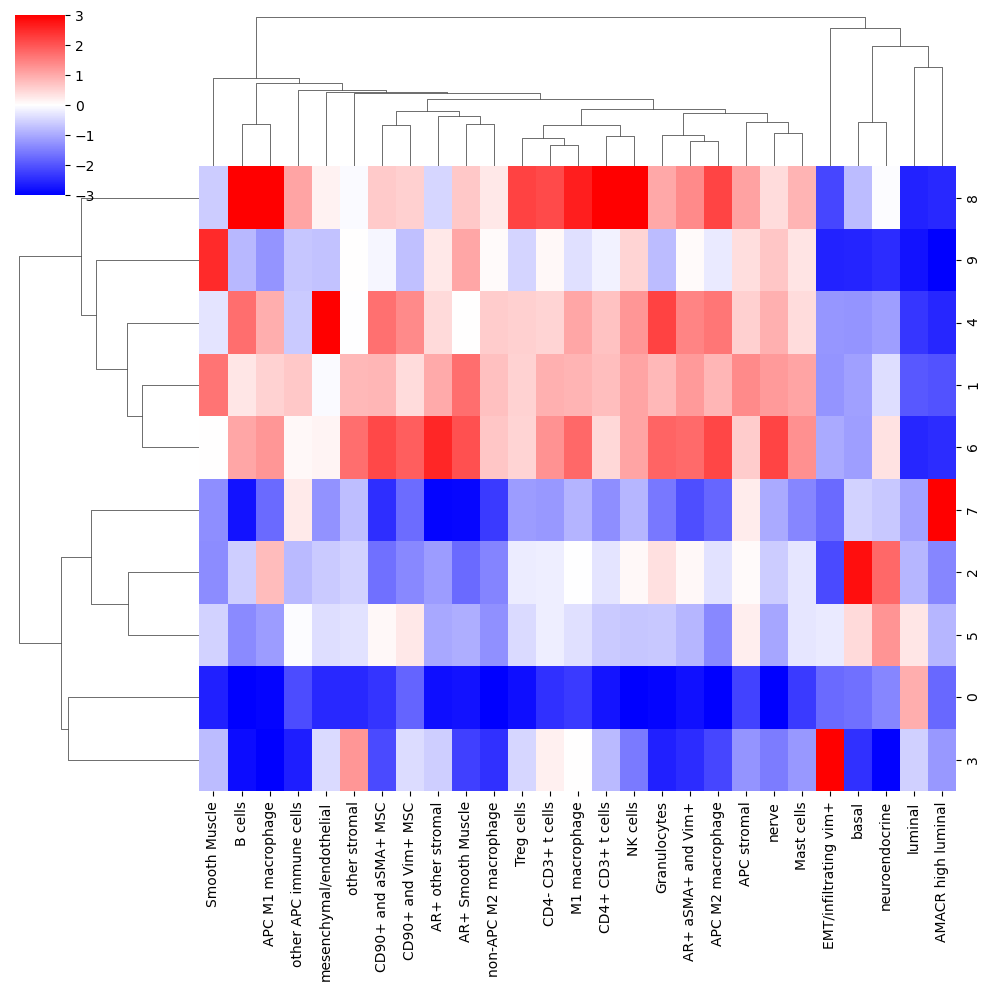

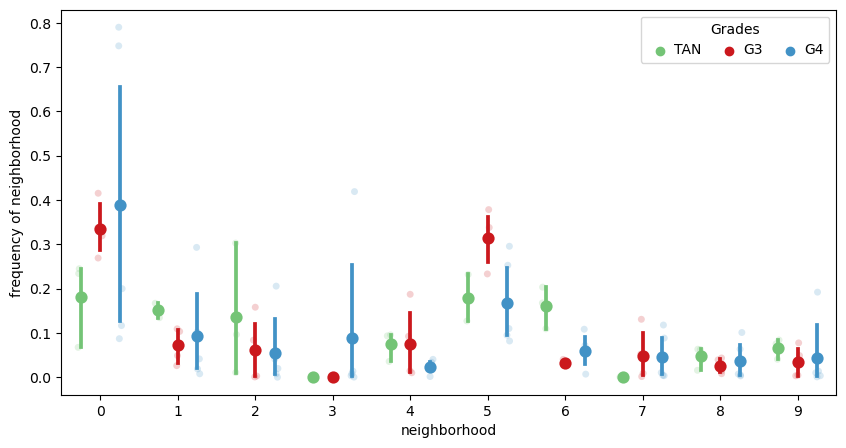

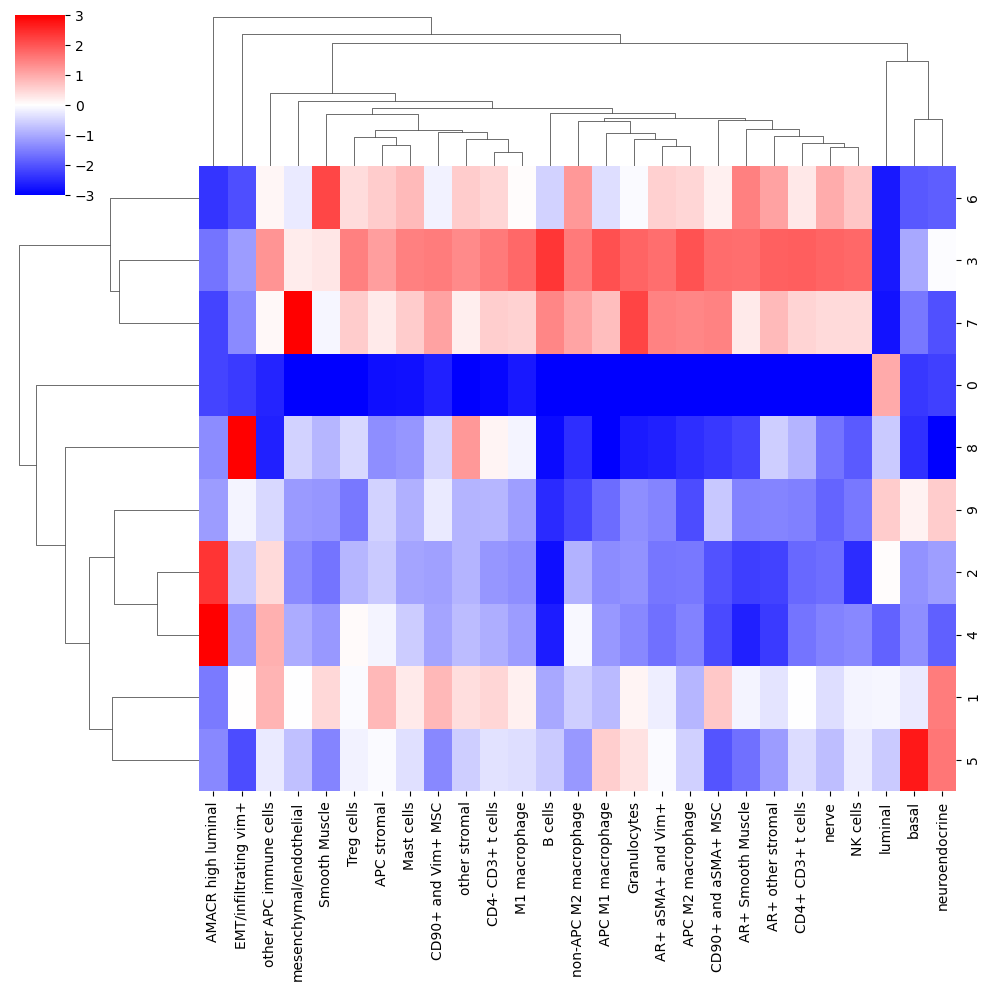

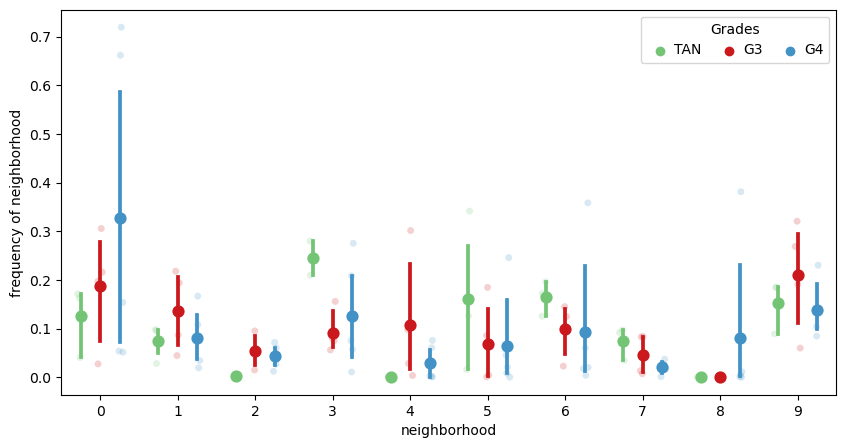

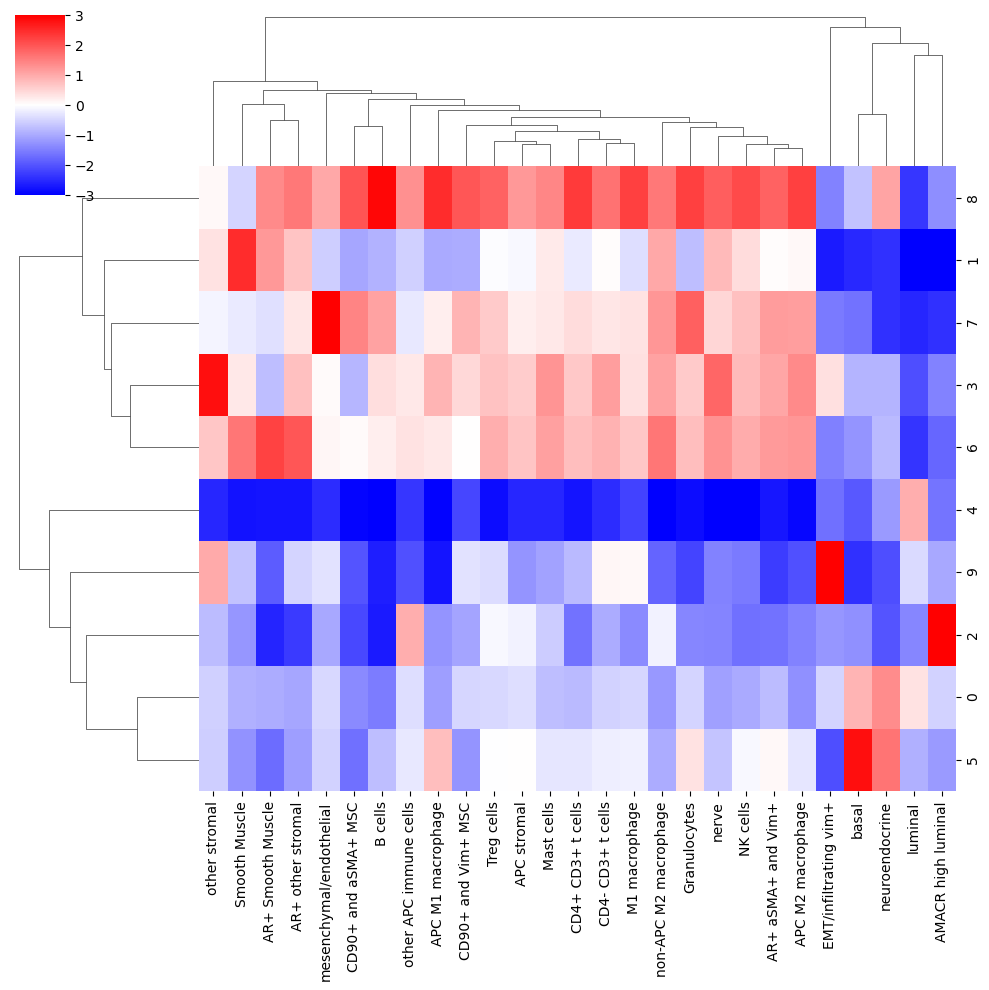

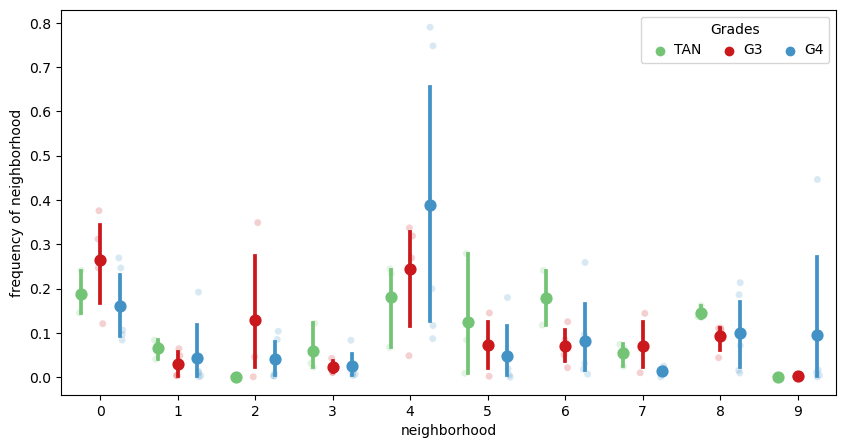

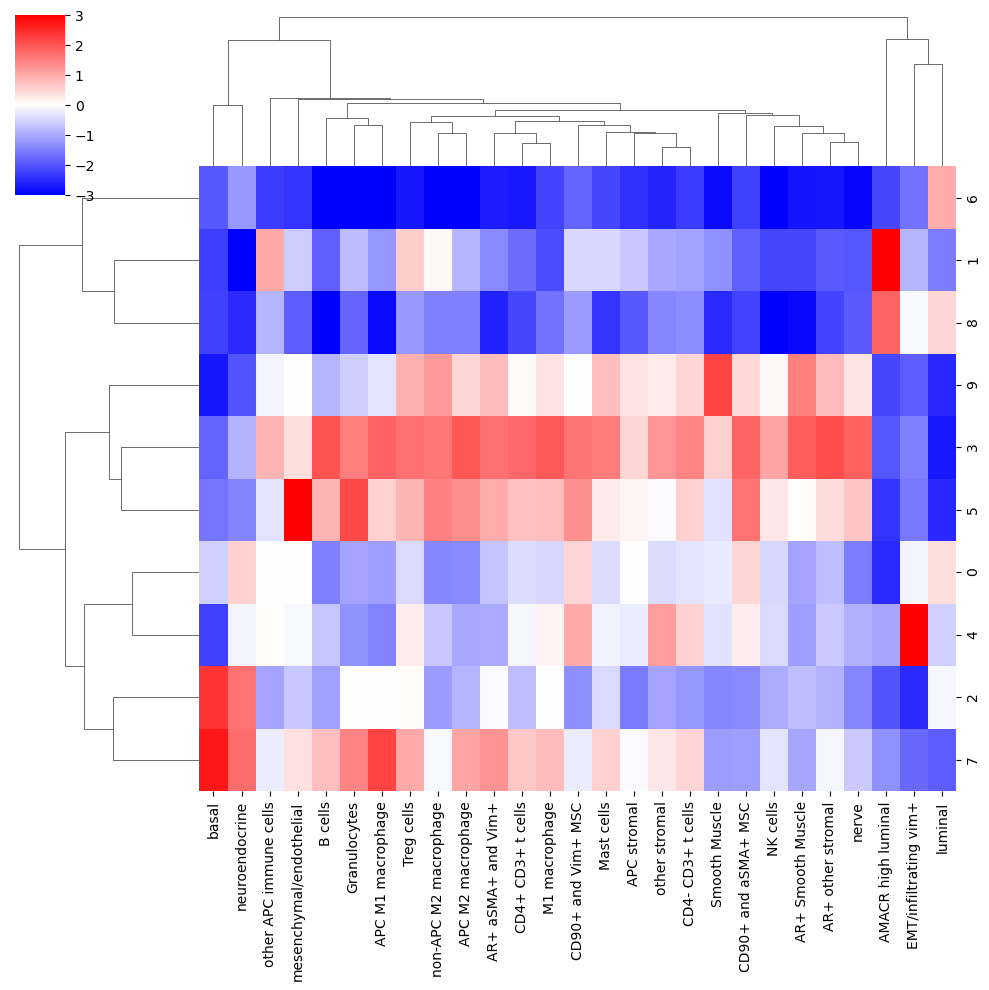

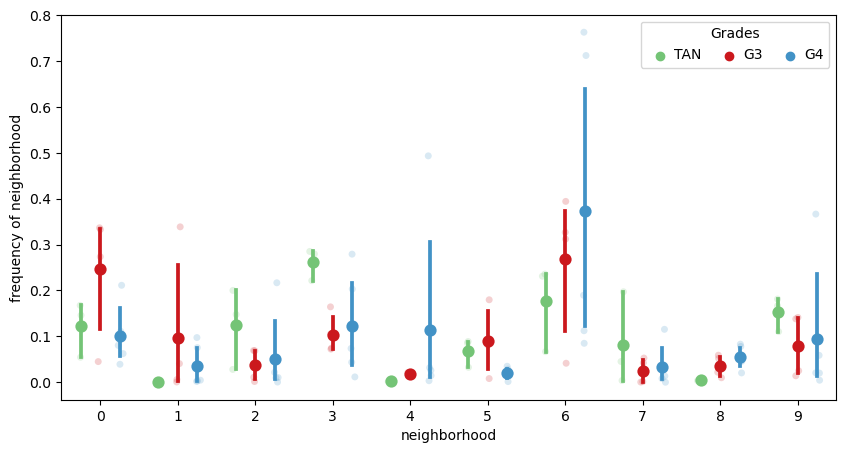

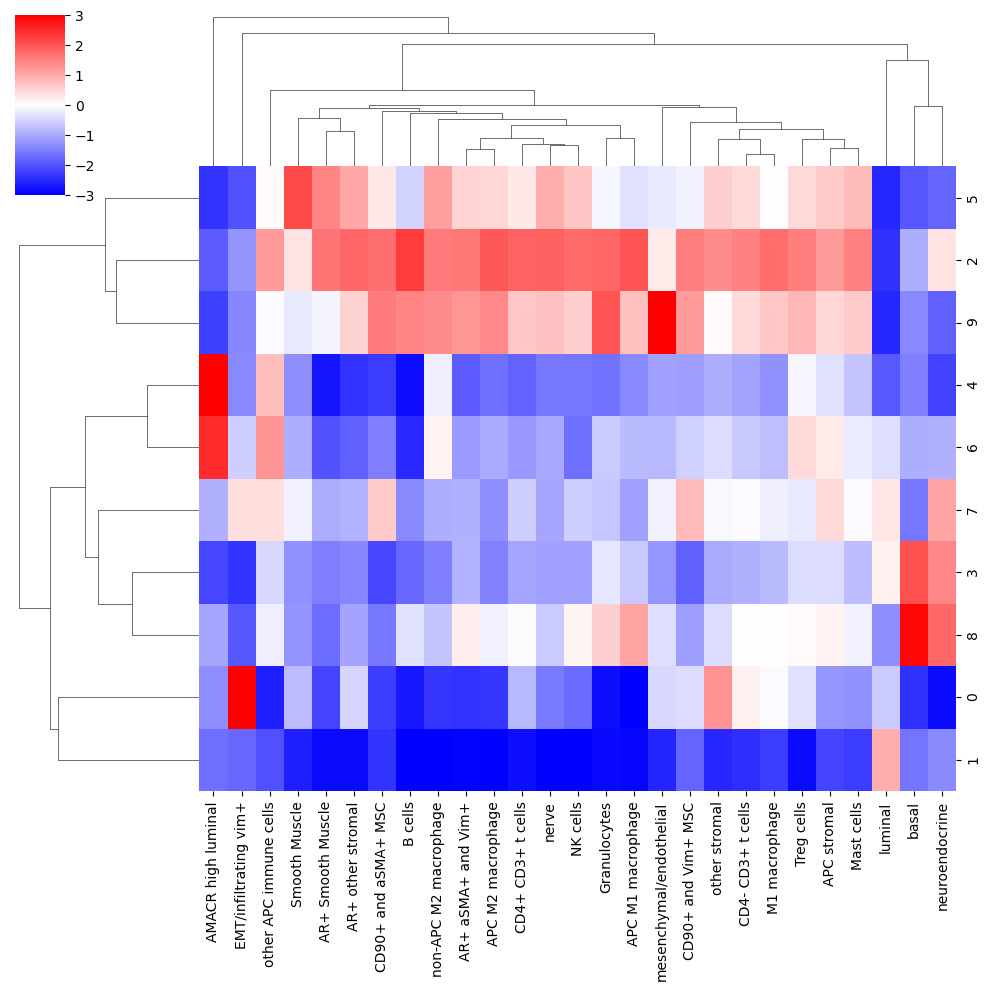

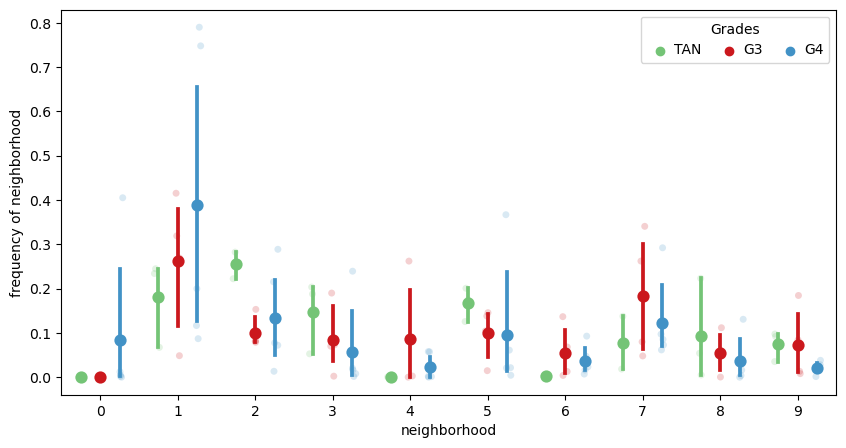

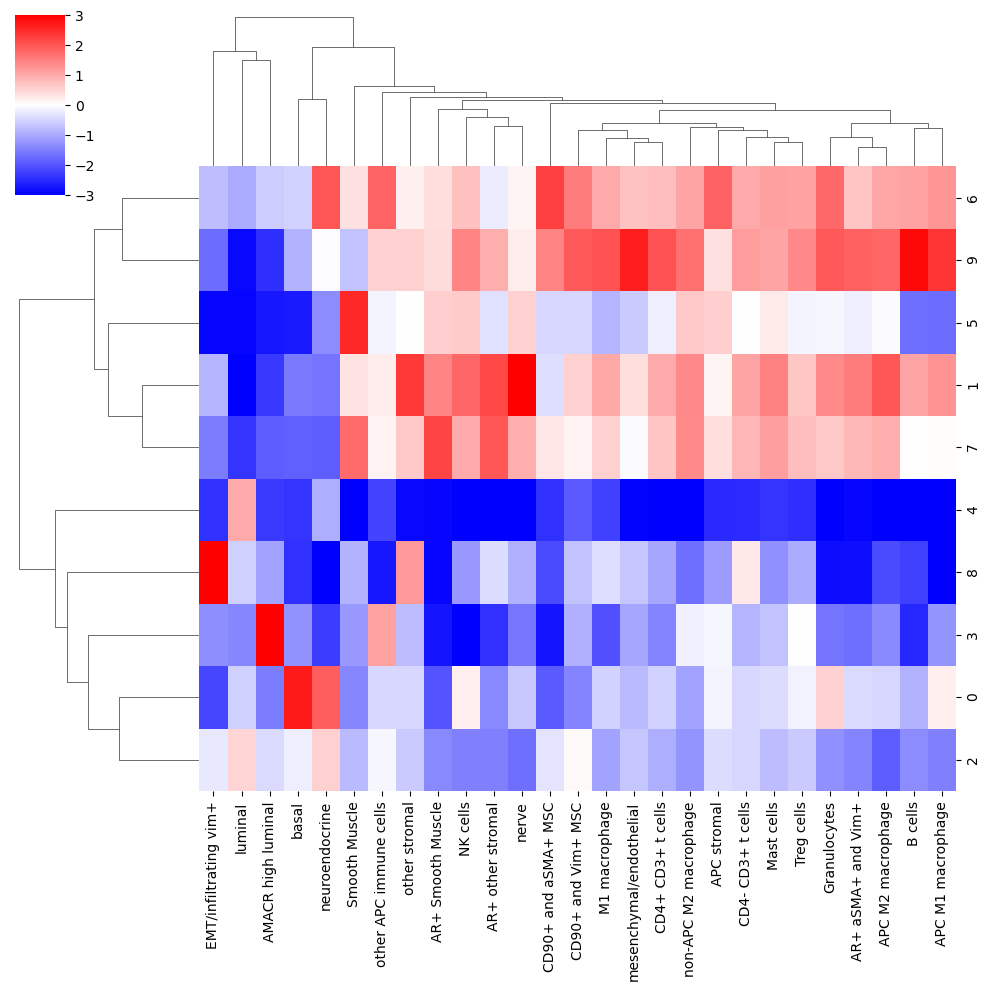

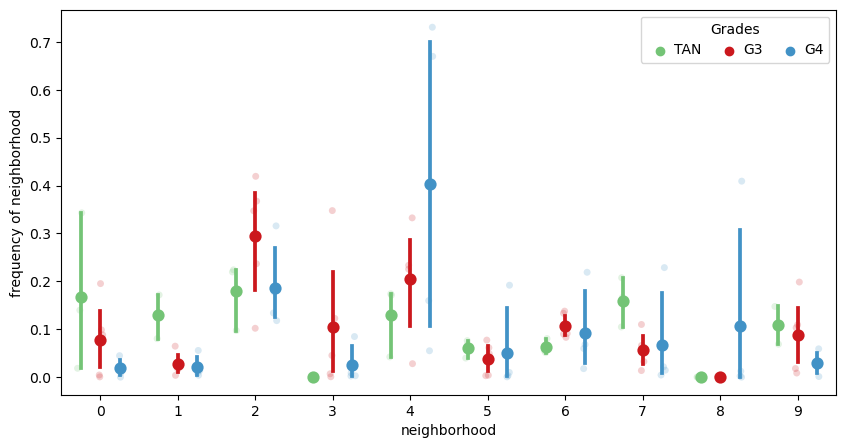

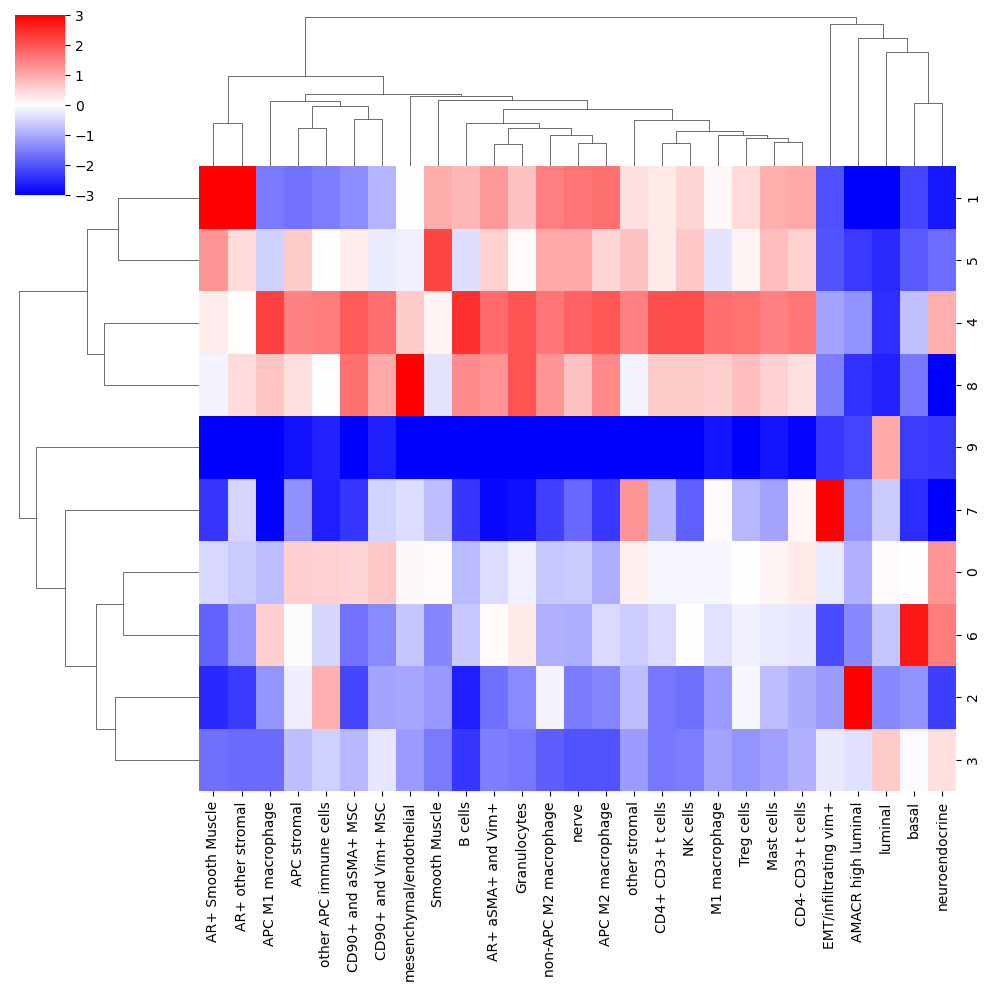

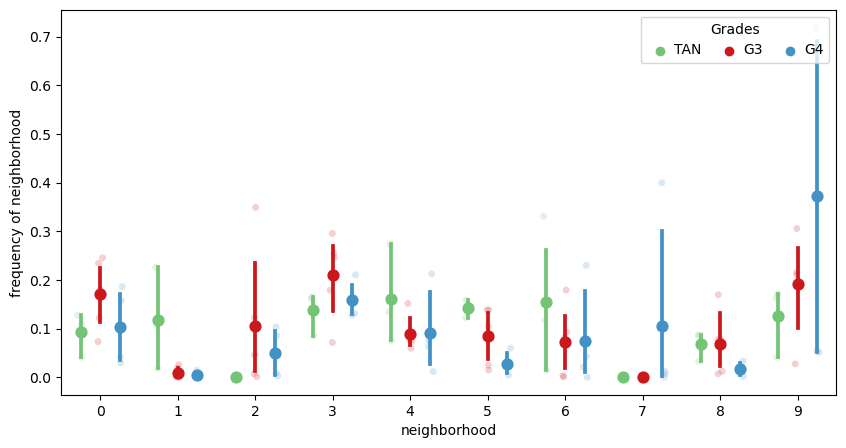

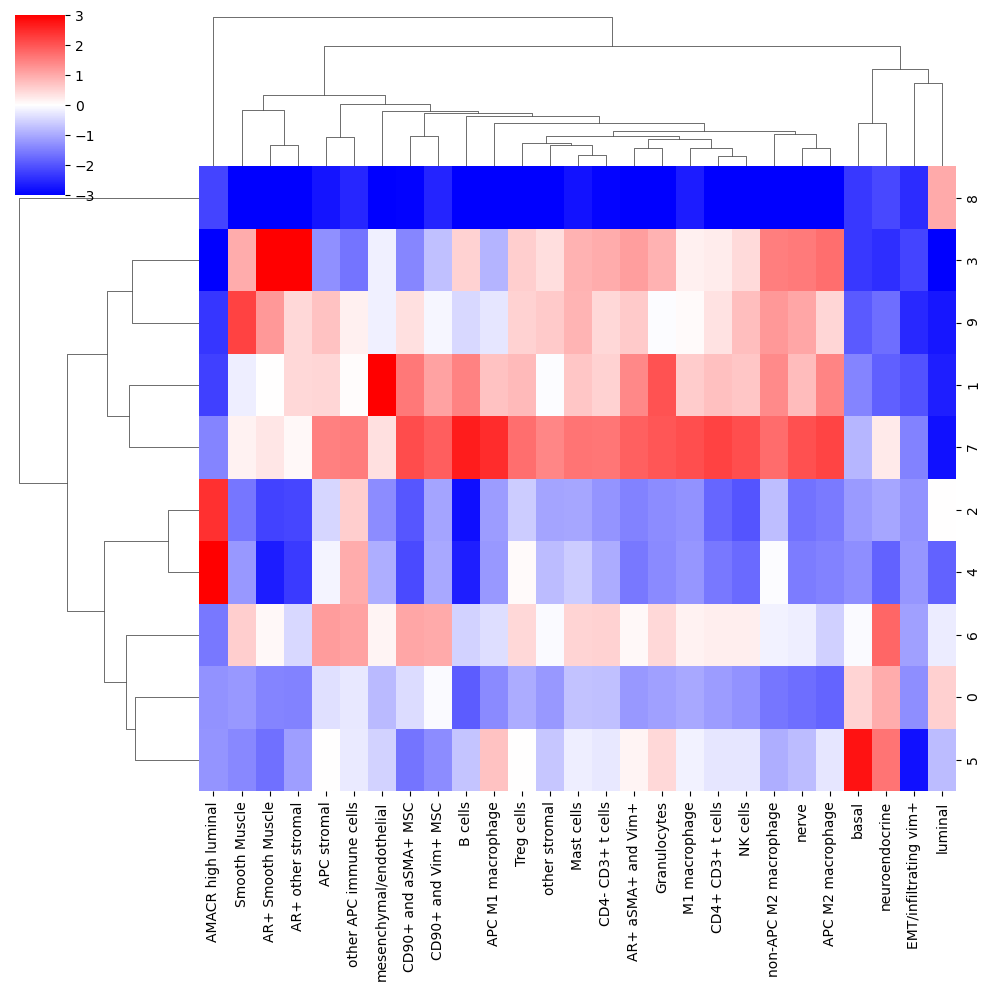

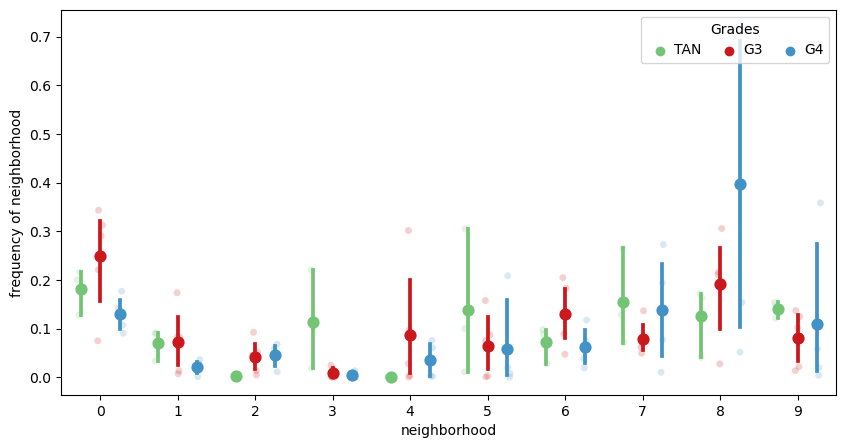

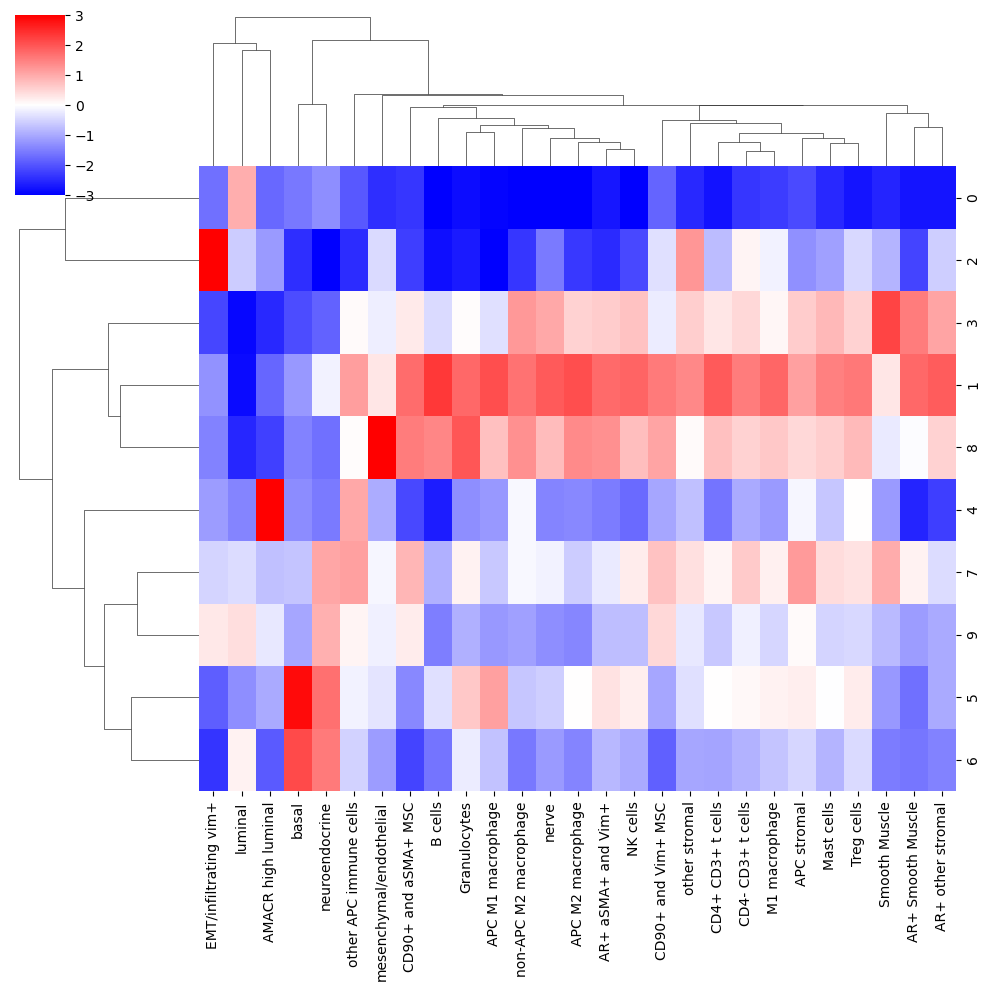

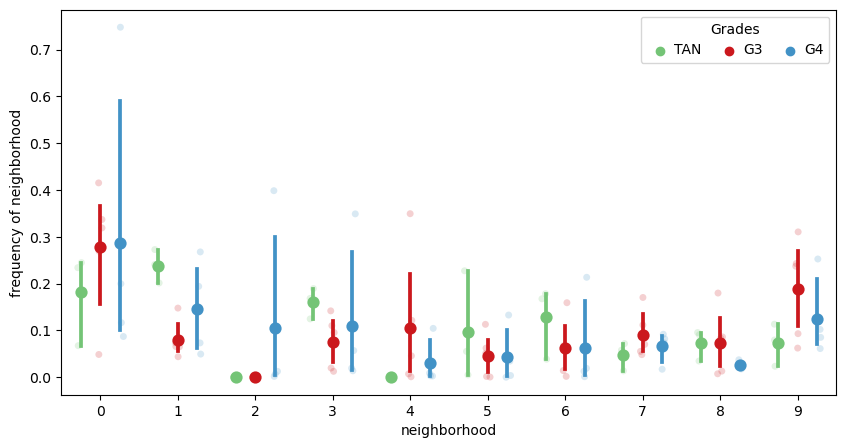

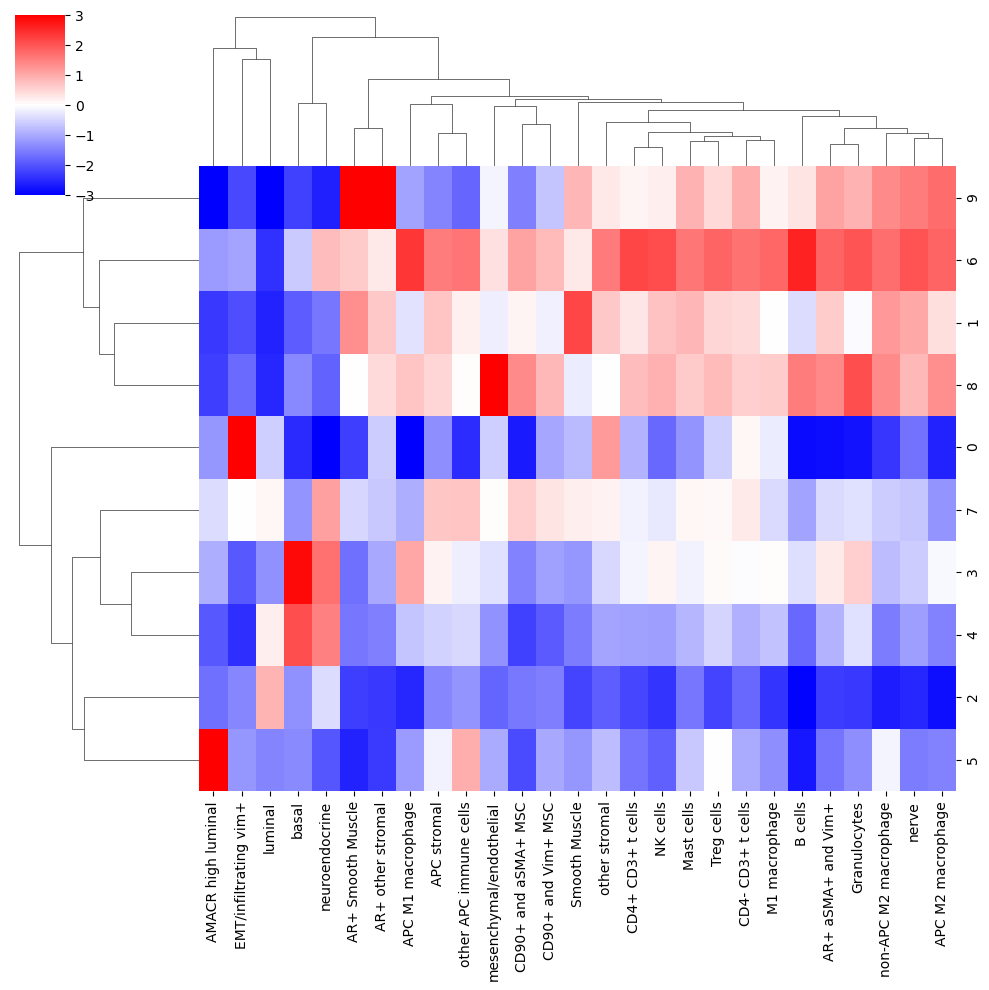

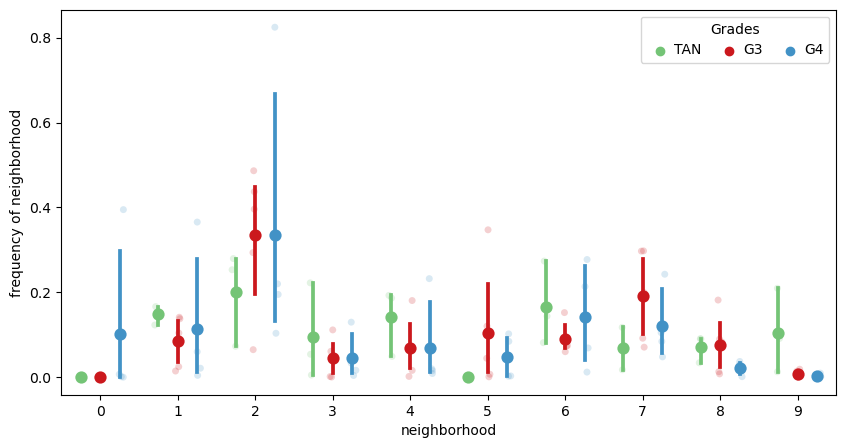

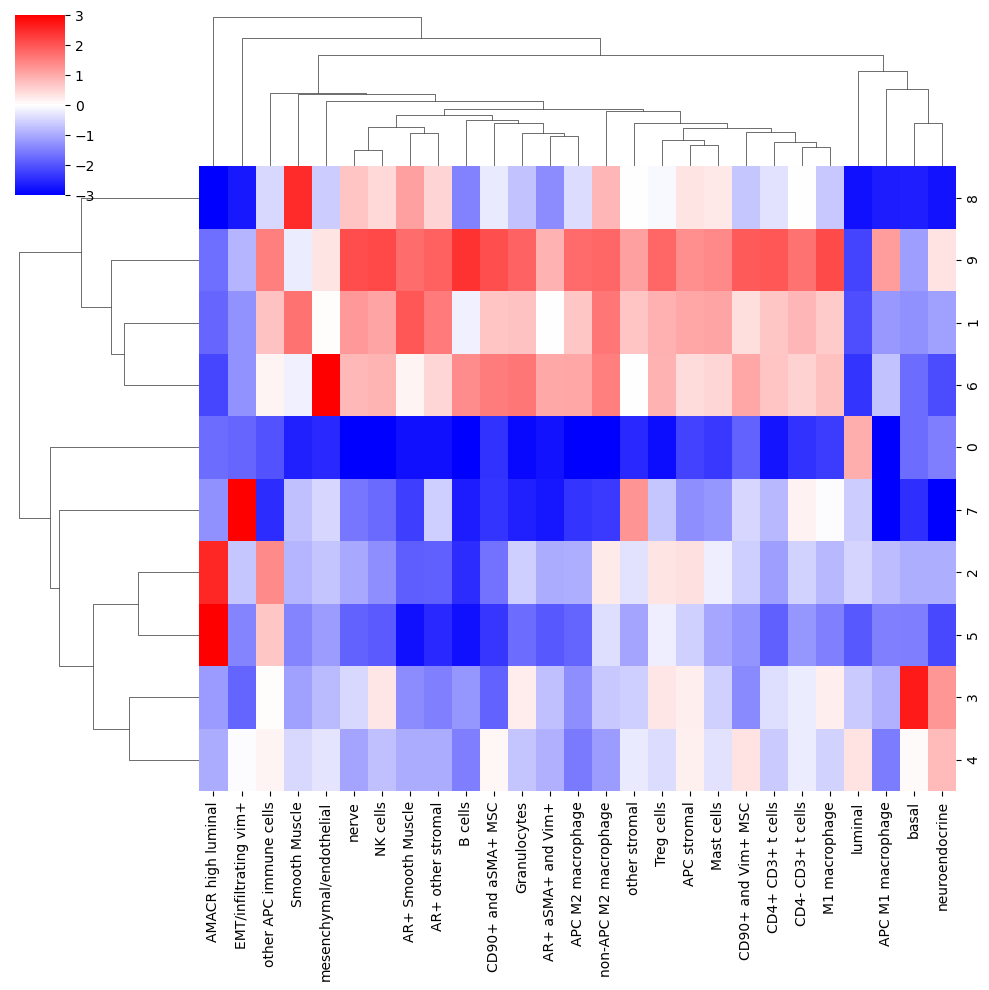

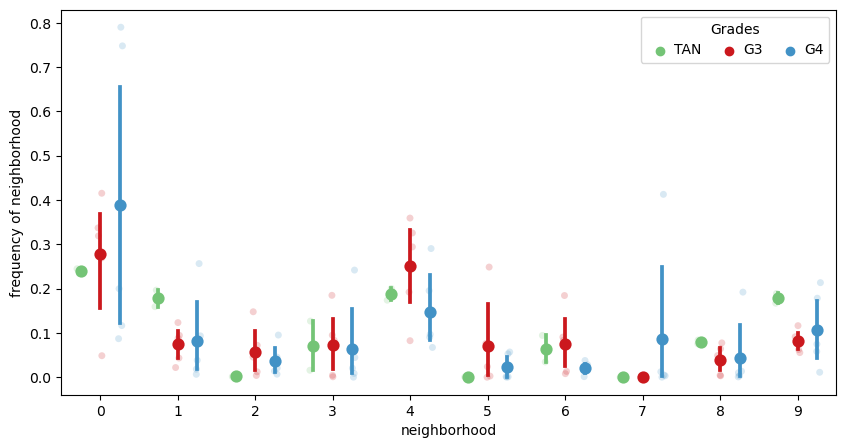

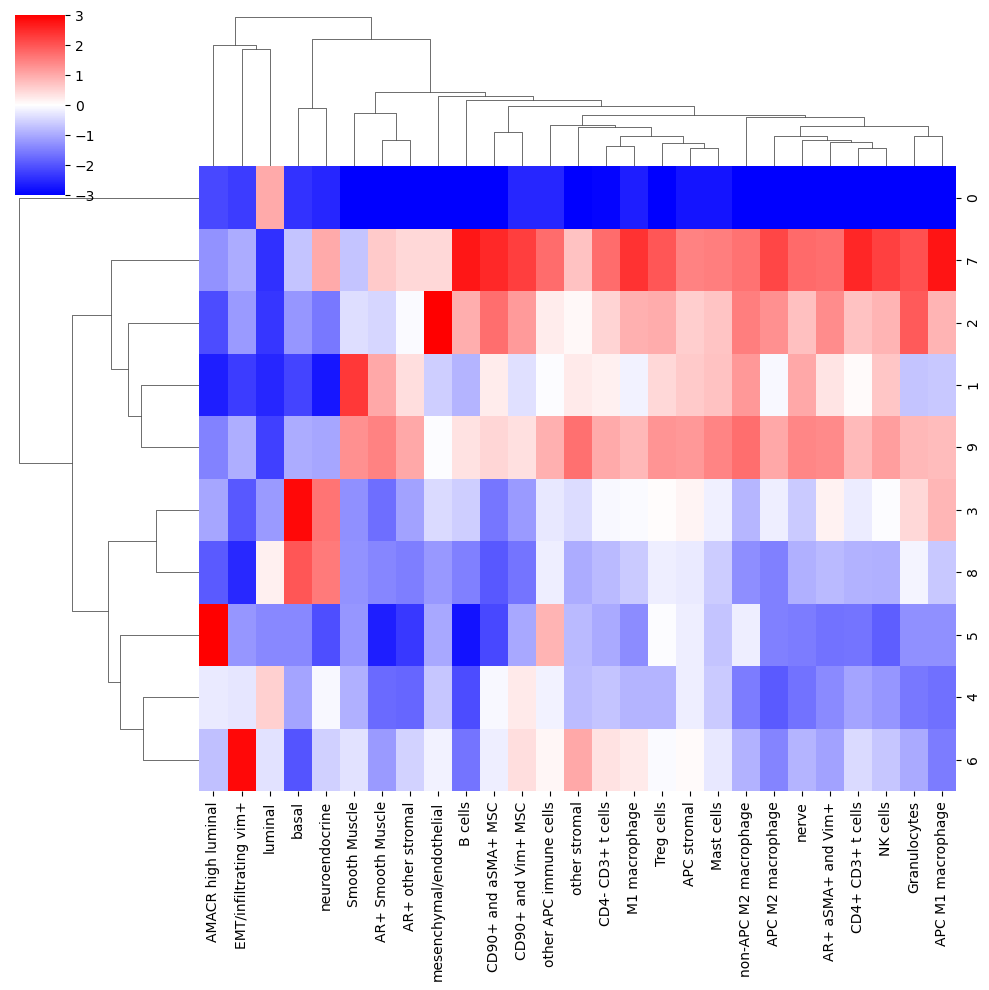

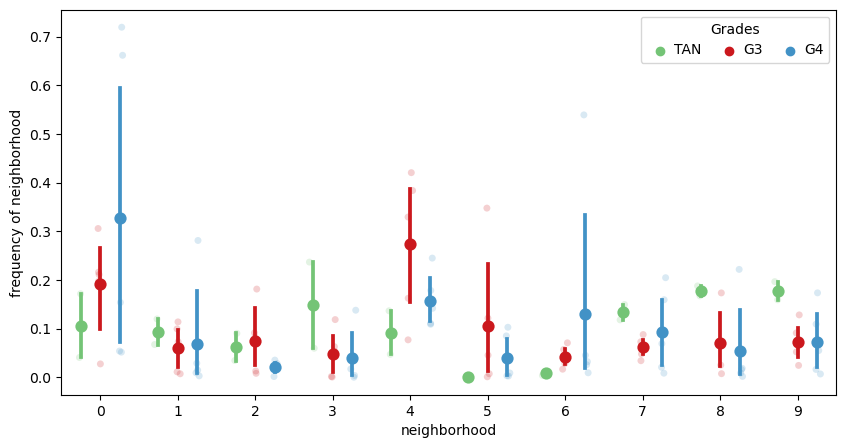

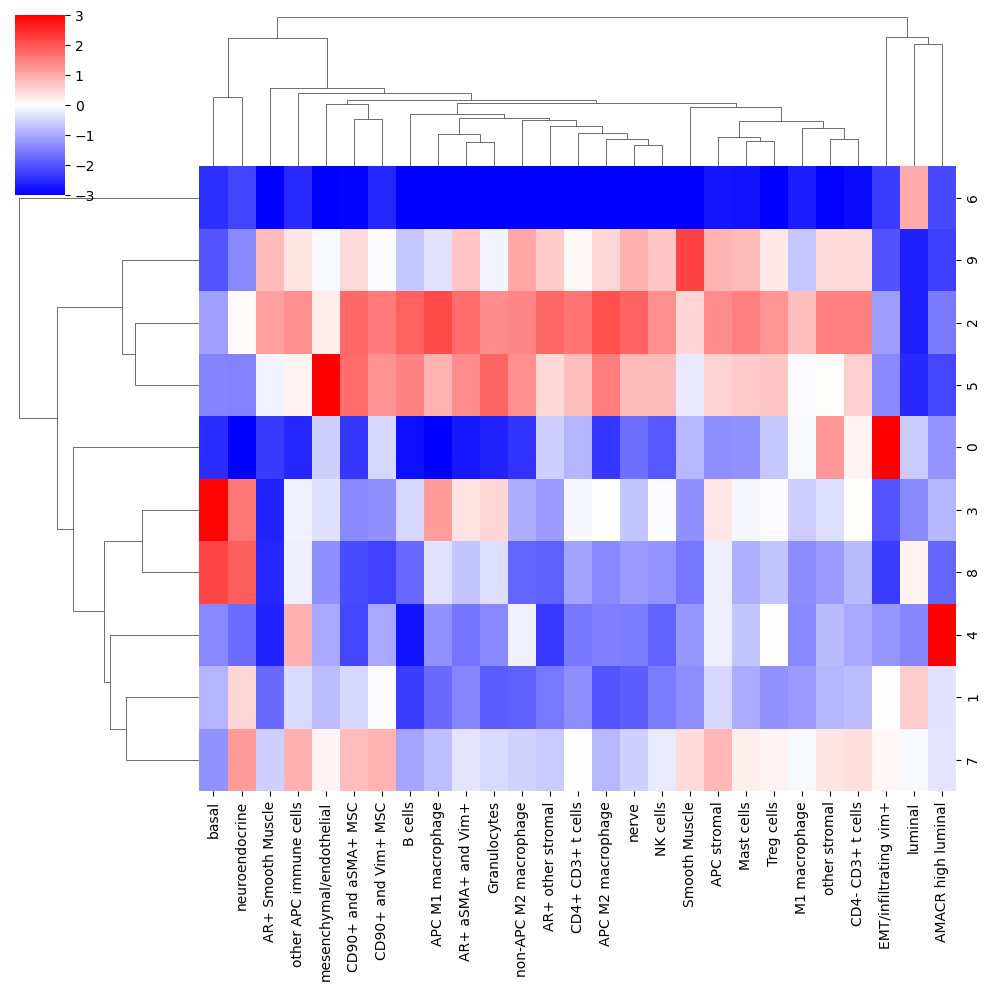

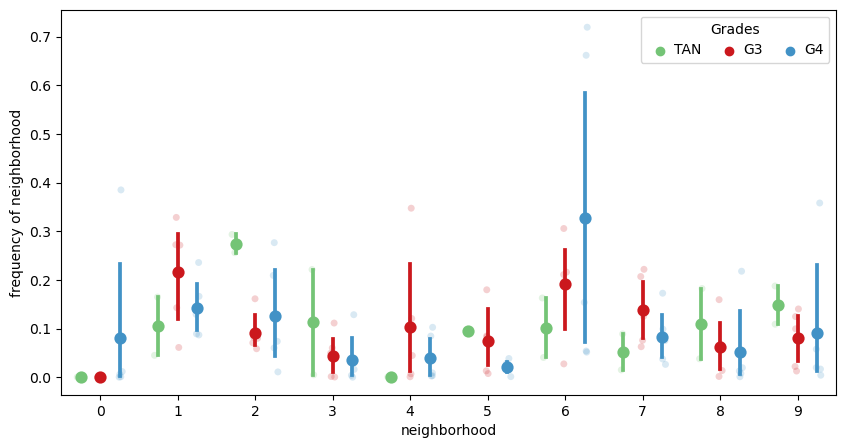

In [6]:
for i in list(cells['patients'].unique()):
    ############
    #read in data and do some quick data rearrangement
    n_neighbors = max(ks)
    assert (file_type=='csv' or file_type =='pickle') #

    if file_type == 'pickle':
        cells = pd.read_pickle(path_to_data)
    if file_type == 'csv':
        #CA read data to be combined
        cells1 = pd.read_csv('G3-PCa_dfmerged_Nolan-names_0904.csv')
        cells2 = pd.read_csv('G4-PCa_dfmerged_Nolan-names_0904.csv')
        cells3 = pd.read_csv('TAN-PCa_dfmerged_Nolan-names_0904.csv')
    
    #CA combine all data read with the next to line
    cells_3groups = [cells1, cells2, cells3]
    cells_all = pd.concat(cells_3groups)

    cells = pd.concat([cells_all,pd.get_dummies(cells_all[cluster_col])],1)


    cells = cells.reset_index() #Uncomment this line if you do any subsetting of dataframe such as removing dirt etc or will throw error at end of next next code block (cell 6)

    sum_cols = cells[cluster_col].unique()
    values = cells[sum_cols].values
    #############
    # exclude patient i from the analysis
    cells=cells[cells['patients'] !=i]
    print(list(cells['patients'].unique()))
    #find windows for each cell in each tissue region
    tissue_group = cells[[X,Y,reg]].groupby(reg)
    exps = list(cells[reg].unique())
    tissue_chunks = [(time.time(),exps.index(t),t,a) for t,indices in tissue_group.groups.items() for a in np.array_split(indices,1)] 
    tissues = [get_windows(job,n_neighbors) for job in tissue_chunks]
    #for each cell and its nearest neighbors, reshape and count the number of each cell type in those neighbors.
    out_dict = {}
    for k in ks:
        for neighbors,job in zip(tissues,tissue_chunks):

            chunk = np.arange(len(neighbors))#indices
            tissue_name = job[2]
            indices = job[3]
            window = values[neighbors[chunk,:k].flatten()].reshape(len(chunk),k,len(sum_cols)).sum(axis = 1)
            out_dict[(tissue_name,k)] = (window.astype(np.float16),indices)

    #concatenate the summed windows and combine into one dataframe for each window size tested.
    windows = {}
    for k in ks:
   
        window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
        window = window.loc[cells.index.values]
        window = pd.concat([cells[keep_cols],window],1)
        windows[k] = window
    k = 10
    n_neighborhoods = 10
    neighborhood_name = "neighborhood"+str(k)
    k_centroids = {}
    windows2 = windows[10]
    # windows2[cluster_col] = cells[cluster_col]

    km = MiniBatchKMeans(n_clusters = n_neighborhoods,random_state=0)

    labelskm = km.fit_predict(windows2[sum_cols].values)
    k_centroids[k] = km.cluster_centers_
    cells['neighborhood10'] = labelskm
    cells[neighborhood_name] = cells[neighborhood_name].astype('category')
    #['reg064_A','reg066_A','reg018_B','reg023_A']
    # this plot shows the types of cells (ClusterIDs) in the different niches 
    k_to_plot = 10
    niche_clusters = (k_centroids[k_to_plot])
    tissue_avgs = values.mean(axis = 0)
    fc = np.log2(((niche_clusters+tissue_avgs)/(niche_clusters+tissue_avgs).sum(axis = 1, keepdims = True))/tissue_avgs)
    fc = pd.DataFrame(fc,columns = sum_cols)
    s=sns.clustermap(fc.loc[[0,1,2,3,4,5,6,7,8,9],], vmin =-3,vmax = 3,cmap = 'bwr',row_cluster = True)
    s.savefig("leave_one_out_ar_cn/celltypes_perniche_10_exclude_patient{}.pdf".format(i))
    ar_cn=np.unique(np.concatenate((np.where(fc['AR+ aSMA+ and Vim+'] > 0),
               np.where(fc['AR+ Smooth Muscle'] > 0), 
               np.where(fc['AR+ other stromal'] > 0)), axis = None))
    #plot for each group and each patient the percent of total cells allocated to each neighborhood
    fc = cells.groupby(['patients','groups']).apply(lambda x: x['neighborhood10'].value_counts(sort = False,normalize = True))

    fc.columns = range(10)
    melt = pd.melt(fc.reset_index(),id_vars = ['patients','groups'])
    melt = melt.rename(columns = {'variable':'neighborhood','value':'frequency of neighborhood'})
    f,ax = plt.subplots(figsize = (10,5))
    sns.stripplot(data = melt, hue = 'groups',dodge = True,alpha = .2,x ='neighborhood', y ='frequency of neighborhood', palette=["#74c476", "#cb181d", "#4292c6"])
    sns.pointplot(data = melt, hue = 'groups',dodge = .5,join = False,x ='neighborhood', y ='frequency of neighborhood', palette=["#74c476", "#cb181d", "#4292c6"])

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:3], ['TAN', 'G3', 'G4'], title="Grades", #CA changed labels[:3] to ['TAN', 'G3', 'G4']
          handletextpad=0, columnspacing=1,
          loc="upper right", ncol=3, frameon=True)
    plt.savefig('leave_one_out_ar_cn/neighborhood_comparison_by_grade_exclude_patient{}.pdf'.format(i))
    
    from scipy.stats import ttest_ind
    #t-test to evaluate if any neighborhood is enriched in one group TAN vs G3
    ttest_tan_g3 =[]
    for cn in range(10):
        n2 = melt[melt['neighborhood']==cn]
        ttest_tan_g3.append(ttest_ind(n2[n2['groups']==0]['frequency of neighborhood'],n2[n2['groups']==3]['frequency of neighborhood']))
    ttest_tan_g3 = pd.DataFrame(ttest_tan_g3)
    ttest_tan_g3 = ttest_tan_g3.loc[ar_cn,:]
    ttest_tan_g3.to_csv('leave_one_out_ar_cn/ttest_tan_g3_exclude_patient{}.csv'.format(i), index=False)
    
    #t-test to evaluate if any neighborhood is enriched in one group TAN vs G4
    ttest_tan_g4 =[]
    for cn in range(10):
        n2 = melt[melt['neighborhood']==cn]
        ttest_tan_g4.append(ttest_ind(n2[n2['groups']==0]['frequency of neighborhood'],n2[n2['groups']==4]['frequency of neighborhood']))
    ttest_tan_g4 = pd.DataFrame(ttest_tan_g4)
    ttest_tan_g3= ttest_tan_g3.loc[ar_cn,:]
    ttest_tan_g4.to_csv('leave_one_out_ar_cn/ttest_tan_g4_exclude_patient{}.csv'.format(i), index=False)
    
    #t-test to evaluate if any neighborhood is enriched in one group G3 vs G4
    ttest_g3_g4 =[]
    for cn in range(10):
        n2 = melt[melt['neighborhood']==cn]
        ttest_g3_g4.append(ttest_ind(n2[n2['groups']==3]['frequency of neighborhood'],n2[n2['groups']==4]['frequency of neighborhood']))
    ttest_g3_g4 = pd.DataFrame(ttest_g3_g4)
    ttest_g3_g4 = ttest_g3_g4.loc[ar_cn,:]
    ttest_g3_g4.to_csv('leave_one_out_ar_cn/ttest_g3_g4_exclude_patient{}.csv'.format(i), index=False)